# WeatherPy

---

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 654


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7a9bfdfe61283050491f5339c229f5


In [12]:
#Define empty lists to fetch weather data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Create counters
record = 0
set_number = 1
skip = 0

# Print to logger
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through all the cities in our list to fetch weather data
for city in cities:
    if (record > 0) and ((record % 50) == 0):
        print("Taking break", time.time())
        time.sleep(1.01)
        set_number += 1
        record += 1
    else:
        #Run an API request for each of the cities
        try: 
            response = requests.get(f"{url}&q={city}").json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {record:03d} of Set {set_number:02d} | {city_record}")
            record += 1
        
        # If an error is experienced, skip the city
        except:
            print("City not found. Skipping...")
            skip += 1
#Indicate that data loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 000 of Set 01 | Khatanga
Processing Record 001 of Set 01 | Flinders
Processing Record 002 of Set 01 | Harper
Processing Record 003 of Set 01 | Busselton
Processing Record 004 of Set 01 | Qaanaaq
Processing Record 005 of Set 01 | Mahébourg
Processing Record 006 of Set 01 | Lebu
Processing Record 007 of Set 01 | Kolondiéba
City not found. Skipping...
Processing Record 008 of Set 01 | Bluff
Processing Record 009 of Set 01 | Albany
Processing Record 010 of Set 01 | Taft
Processing Record 011 of Set 01 | Kaitangata
Processing Record 012 of Set 01 | Krasnosel'kup
Processing Record 013 of Set 01 | Bermeo
Processing Record 014 of Set 01 | Alyangula
Processing Record 015 of Set 01 | Umm Kaddadah
Processing Record 016 of Set 01 | Cabo San Lucas
Processing Record 017 of Set 01 | Magadan
Processing Record 018 of Set 01 | Port Blair
Processing Record 019 of Set 01 | Rikitea
Processing Record 020 of Set 01 | Poum
Processing R

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-34.85,99,55,6.13,RU,1672119233
1,Flinders,-34.5833,150.8552,84.18,67,3,8.99,AU,1672119234
2,Harper,4.3750,-7.7169,76.33,82,31,6.96,LR,1672119234
3,Busselton,-33.6500,115.3333,75.58,36,2,16.02,AU,1672119235
4,Qaanaaq,77.4840,-69.3632,-10.62,99,100,5.66,GL,1672119235


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Khatanga,71.9667,102.5000,-34.85,99,55,6.13,RU,1672119233
1,Flinders,-34.5833,150.8552,84.18,67,3,8.99,AU,1672119234
2,Harper,4.3750,-7.7169,76.33,82,31,6.96,LR,1672119234
3,Busselton,-33.6500,115.3333,75.58,36,2,16.02,AU,1672119235
4,Qaanaaq,77.4840,-69.3632,-10.62,99,100,5.66,GL,1672119235


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

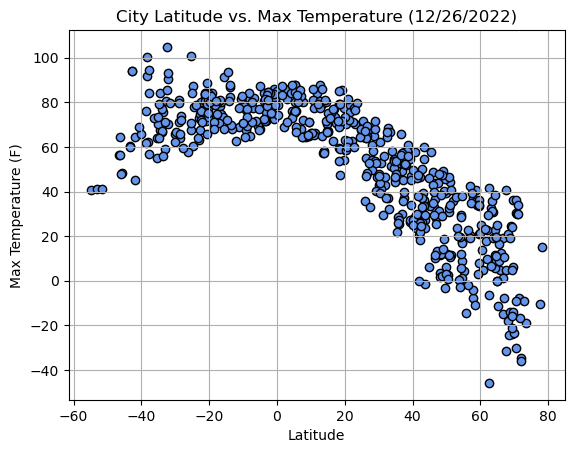

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig('Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

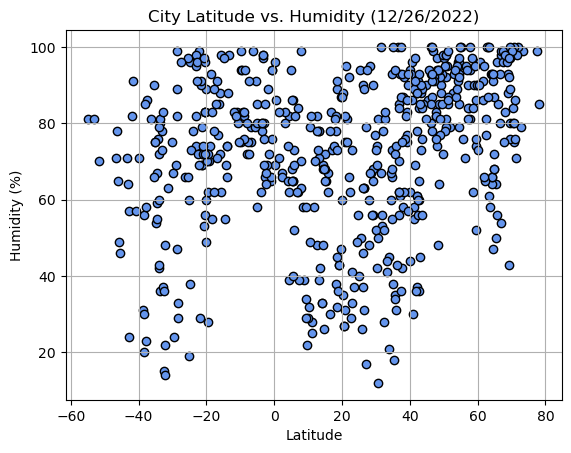

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

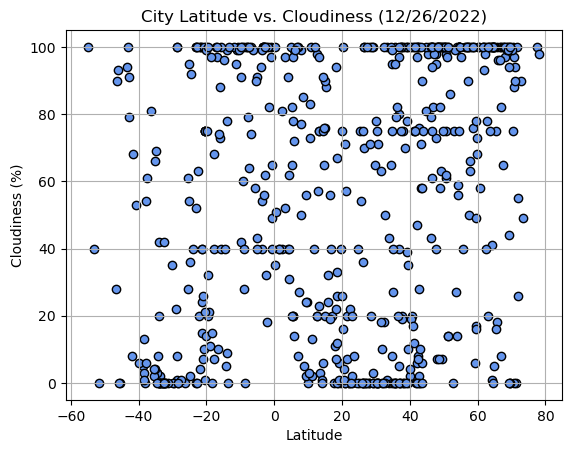

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

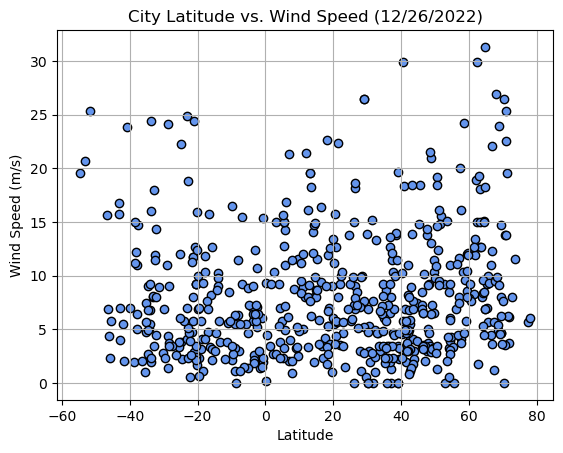

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Khatanga,71.9667,102.5000,-34.85,99,55,6.13,RU,1672119233
2,Harper,4.3750,-7.7169,76.33,82,31,6.96,LR,1672119234
4,Qaanaaq,77.4840,-69.3632,-10.62,99,100,5.66,GL,1672119235
7,Kolondiéba,11.0882,-6.8926,66.07,28,13,5.03,ML,1672119237
9,Albany,42.6001,-73.9662,24.03,65,100,4.14,US,1672119109


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0), :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Flinders,-34.5833,150.8552,84.18,67,3,8.99,AU,1672119234
3,Busselton,-33.6500,115.3333,75.58,36,2,16.02,AU,1672119235
5,Mahébourg,-20.4081,57.7000,83.25,83,75,9.22,MU,1672119236
6,Lebu,-37.6167,-73.6500,56.70,86,61,14.74,CL,1672119236
8,Bluff,-46.6000,168.3333,56.48,71,28,15.68,NZ,1672119238


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8590381730954252


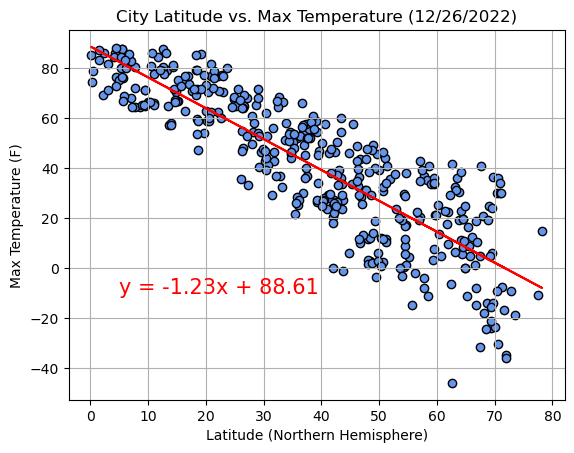

In [56]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'])
regress_values = (northern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (12/26/2022)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, -10), fontsize = 15, color = "red")

plt.savefig("TempRegress1.png")

plt.show()

The r-value is: 0.3792890022922593


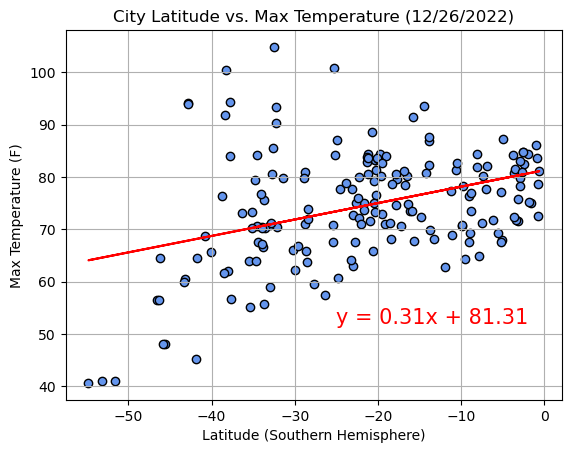

In [57]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'])
regress_values = (southern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (12/26/2022)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25,52), fontsize = 15, color = "red")

plt.savefig("TempRegress2.png")

plt.show()

**Discussion about the linear relationship:** Statistically significant. Has a linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43985951941355933


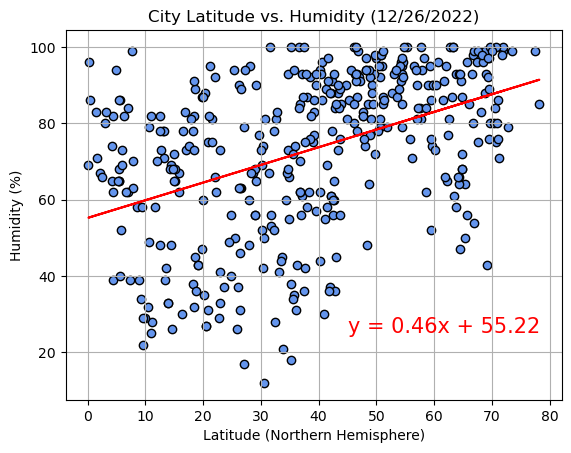

In [58]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Humidity'])
regress_values = (northern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Humidity'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (12/26/2022)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 25), fontsize = 15, color = "red")

plt.savefig("HumidityRegress1.png")

plt.show()

The r-value is: 0.36664226244464465


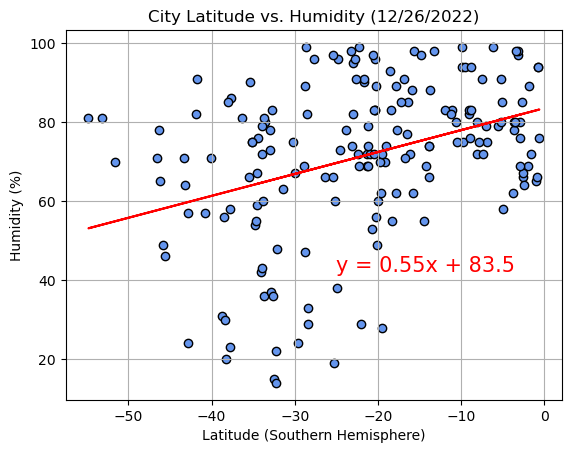

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Humidity'])
regress_values = (southern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Humidity'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (12/26/2022)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 42), fontsize = 15, color = "red")

plt.savefig("HumidityRegress2.png")

plt.show()

**Discussion about the linear relationship:** Not statistically significant. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3124957500574789


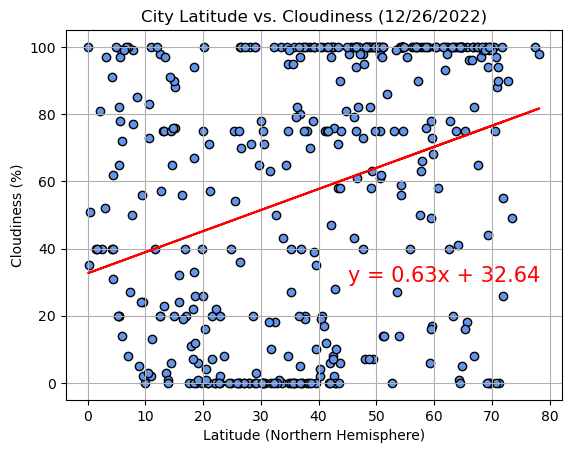

In [60]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'])
regress_values = (northern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (12/26/2022)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 30), fontsize = 15, color = "red")

plt.savefig("CloudRegress1.png")

plt.show()

The r-value is: 0.42530604351679685


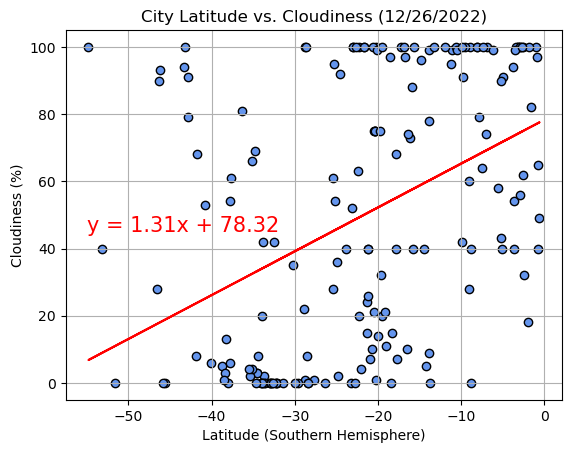

In [61]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'])
regress_values = (southern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (12/26/2022)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 45), fontsize = 15, color = "red")

plt.savefig("CloudRegress2.png")

plt.show()

**Discussion about the linear relationship:** Not statistically significant. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10996592932856644


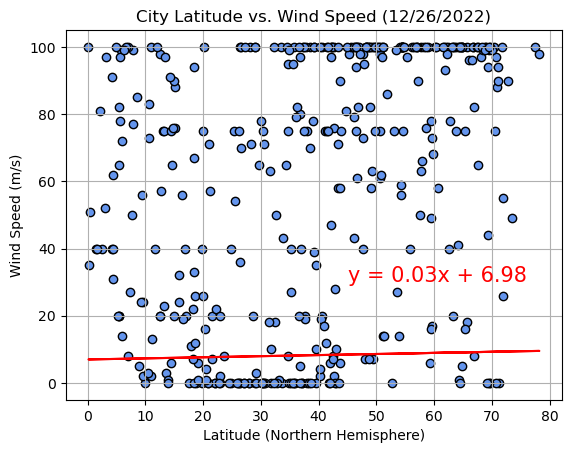

In [62]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'])
regress_values = (northern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (12/26/2022)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 30), fontsize = 15, color = "red")

plt.savefig("WindRegress1.png")

plt.show()

The r-value is: -0.26875710605023967


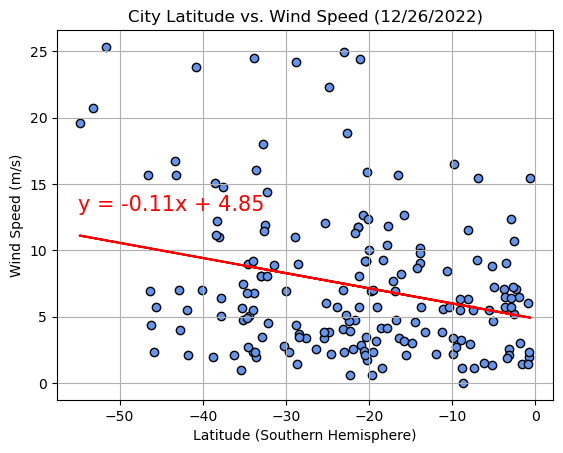

In [68]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'])
regress_values = (southern_hemi_df["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], marker = "o", facecolors = "cornflowerblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (12/26/2022)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.style.use('fast')
                                                           
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 13), fontsize = 15, color = "red")

plt.savefig("WindRegress2.png")

plt.show()

**Discussion about the linear relationship:** Not statistically significant. 